In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [2]:
# load example data

data(iris)

In [13]:
# filter down to two classes and one measurement

iris %>%
    as.tbl %>%
    filter(Species != "setosa") %>%
    droplevels() %>%
    select(Sepal.Length, Species) ->
    df

In [14]:
# this is what we have left

df %>% str

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	100 obs. of  2 variables:
 $ Sepal.Length: num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ Species     : Factor w/ 2 levels "versicolor","virginica": 1 1 1 1 1 1 1 1 1 1 ...


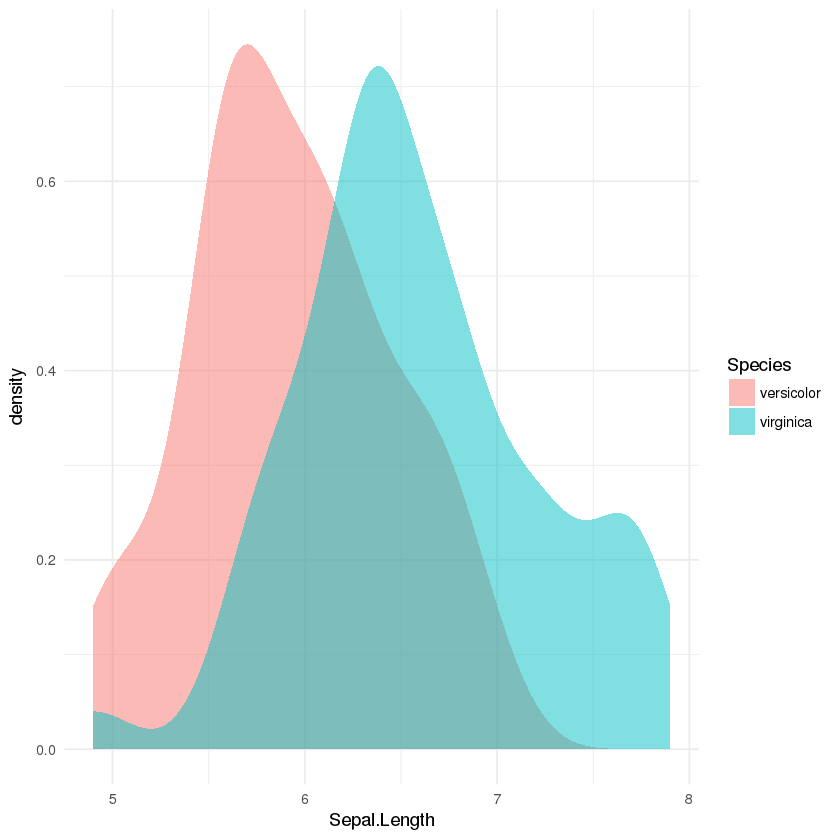

In [15]:
# plot the distributions -- play with the bin-width parameter to see the effect of smoothing

df %>%
    ggplot +
    geom_density(aes(x=Sepal.Length, fill=Species), bw=0.2, alpha=0.5, color=NA) +
    theme_minimal()

In [6]:
# prep the data for a statistical test

df %>% filter(Species == "versicolor") -> A
df %>% filter(Species == "virginica")  -> B

In [7]:
# run the test

wilcox.test(A$Sepal.Length, B$Sepal.Length)


	Wilcoxon rank sum test with continuity correction

data:  A$Sepal.Length and B$Sepal.Length
W = 526, p-value = 5.869e-07
alternative hypothesis: true location shift is not equal to 0


In [24]:
# run test on data we know should be the same

N <- 150

C <- rnorm(N)
D <- rnorm(N)

df_same <- tibble(C=C,D=D)

wilcox.test(C,D)


	Wilcoxon rank sum test with continuity correction

data:  C and D
W = 12174, p-value = 0.219
alternative hypothesis: true location shift is not equal to 0


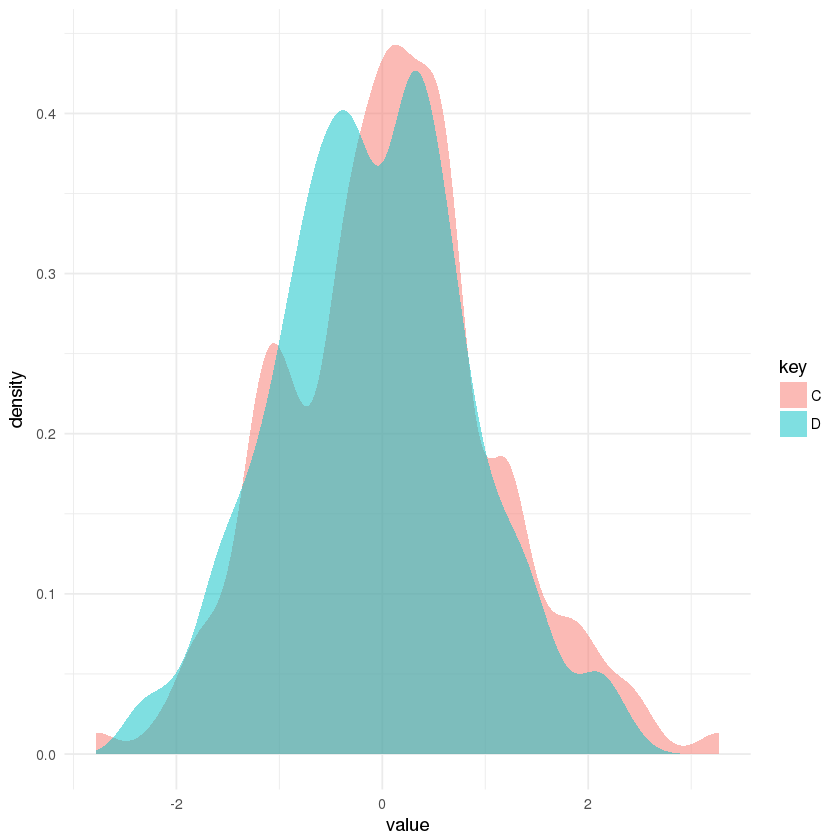

In [25]:
df_same %>% gather %>%
    ggplot +
    geom_density(aes(x=value, fill=key), bw=0.2, alpha=0.5, color=NA) +
    theme_minimal()

In [28]:
# run test on data we know should be slightly different

N <- 150

C <- rnorm(N)
D <- rnorm(N) + 0.25

df_different <- tibble(C=C,D=D)

wilcox.test(C,D)


	Wilcoxon rank sum test with continuity correction

data:  C and D
W = 9420, p-value = 0.01488
alternative hypothesis: true location shift is not equal to 0


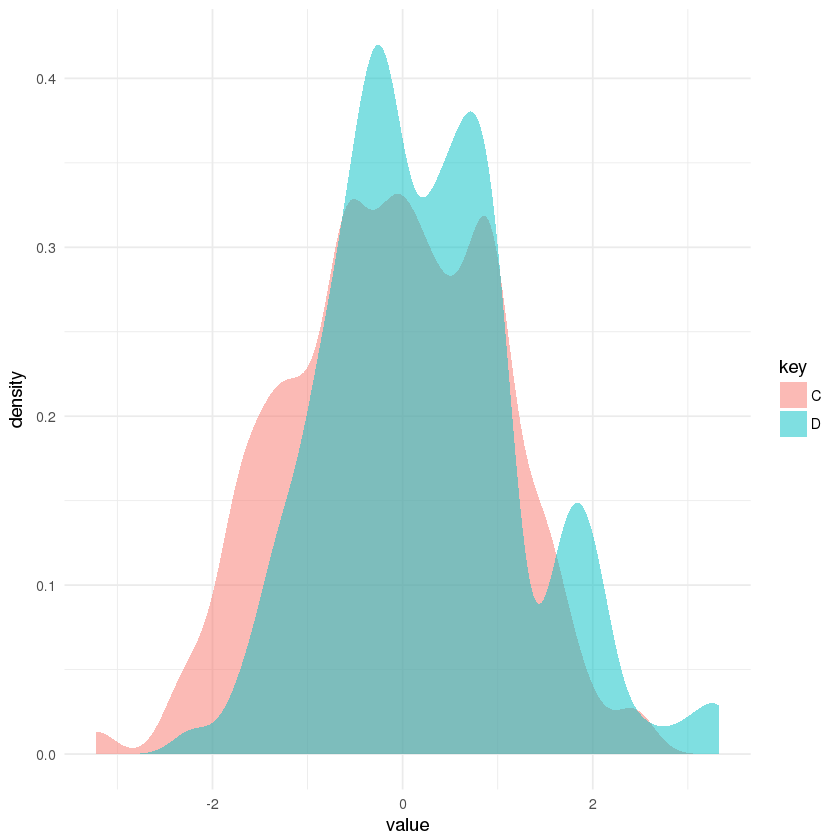

In [29]:
df_different %>% gather %>%
    ggplot +
    geom_density(aes(x=value, fill=key), bw=0.2, alpha=0.5, color=NA) +
    theme_minimal()